In [1]:
# mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

In [2]:
import six

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = 'figures' #'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
# study = flotilla.embark('singlecell_pnm_figure2_modalities_rmdup', 
study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

2017-01-13 09:36:57	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2017-01-13 09:36:57	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-13 09:39:15 	Initializing Study
2017-01-13 09:39:15 	Initializing Predictor configuration manager for Study
2017-01-13 09:39:15	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-13 09:39:15	Added ExtraTreesClassifier to default predictors
2017-01-13 09:39:15	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-13 09:39:15	Added ExtraTreesRegressor to default predictors
2017-01-13 09:39:15	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-13 09:39:15	Added GradientBoostingClassifier to default predictors
2017-01-13 09:39:15	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-13 09:39:15	Added GradientBoostingRegressor to default predictors
2017-01-13 09:39:15 	Loading metadata
2017-01-13 09:39:15	Loading expression data
2017-0

In [3]:
figure_folder = 'figures/001_modality_transitions_heatmaps_barplots'

In [4]:
# mkdir $folder

In [5]:
modality_transitions = study.supplemental.modalities_tidy.merge(
    study.supplemental.modalities_tidy, left_on='event_id', right_on='event_id')
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included
1,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included
2,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,iPSC,included
3,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included
4,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included


In [6]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,MN-MN
1,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,MN-NPC
2,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,iPSC,included,MN-iPSC
3,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,NPC-MN
4,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,NPC-NPC


In [7]:
transitions_of_interest = ['iPSC-NPC', 'iPSC-MN']

In [8]:
modality_transitions_subset = modality_transitions.query('transition in @transitions_of_interest')
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,iPSC-MN
7,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,iPSC-NPC
15,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,NPC,bimodal,iPSC-NPC
24,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN


In [9]:
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,iPSC-MN
7,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,iPSC-NPC
15,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,NPC,bimodal,iPSC-NPC
24,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN


In [10]:
modality_transitions_subset.query('transition == "iPSC-MN"')['event_id'].unique().shape

(5903,)

In [11]:
(modality_transitions_subset.modality_x == modality_transitions_subset.modality_y).sum()

12005

In [12]:
ipsc_mn_changing_events = set(modality_transitions_subset.query(
        '(transition == "iPSC-MN") & (modality_x != modality_y)')['event_id'])
ipsc_npc_changing_events = set(modality_transitions_subset.query(
        '(transition == "iPSC-NPC") & (modality_x != modality_y)')['event_id'])
six.print_(len(ipsc_npc_changing_events), len(ipsc_mn_changing_events))

1532 1059


In [14]:
events_detected_in_all = set(study.supplemental.modalities_tidy.groupby('event_id').filter(
    lambda x: len(x) == len(study.phenotype_order))['event_id'])
len(events_detected_in_all)

5528

In [15]:
ipsc_mn_changing_events_detected_in_all = ipsc_mn_changing_events & events_detected_in_all
ipsc_npc_changing_events_detected_in_all = ipsc_npc_changing_events & events_detected_in_all

## Venn diagrams

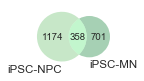

In [16]:
import matplotlib_venn
sns.set(context='paper', style='ticks')

fig, ax = plt.subplots(figsize=(1.5, 1.5))

matplotlib_venn.venn2((ipsc_npc_changing_events, ipsc_mn_changing_events), 
                      set_labels=['iPSC-NPC', 'iPSC-MN'], set_colors=study.phenotype_color_ordered[1:])
fig.savefig('{}/changing_events_venn.pdf'.format(folder))

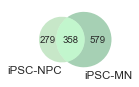

In [17]:
import matplotlib_venn

fig, ax = plt.subplots(figsize=(1.5, 1.5))

matplotlib_venn.venn2((ipsc_npc_changing_events_detected_in_all, ipsc_mn_changing_events_detected_in_all), 
                      set_labels=['iPSC-NPC', 'iPSC-MN'], set_colors=study.phenotype_color_ordered[1:])
fig.savefig('{}/changing_events_venn_detected_in_all.pdf'.format(folder))

### Barplots of the percentage of evetns changing in each modality

In [18]:
modality_transitions_subset['transition'] = pd.Categorical(modality_transitions_subset['transition'], 
                                                           categories=transitions_of_interest, ordered=True)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
modality_transitions_subset.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,iPSC-MN
7,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,iPSC-NPC
15,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,NPC,bimodal,iPSC-NPC
24,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN


In [20]:
bimodal_x = modality_transitions_subset['modality_x'] == 'bimodal'
bimodal_y = modality_transitions_subset['modality_y'] == 'bimodal'

print((bimodal_x & bimodal_y).sum())

bimodal_bimodal = modality_transitions_subset.loc[bimodal_x & bimodal_y]
bimodal_bimodal.groupby('transition').size()

872


transition
iPSC-NPC    603
iPSC-MN     269
dtype: int64

In [21]:
same_modality = modality_transitions_subset.groupby('transition').apply(lambda x: (x['modality_y'] == x['modality_x']).sum())
same_modality.name = 'Same Modality'
changing_modality = modality_transitions_subset.groupby('transition').apply(lambda x: (x['modality_y'] != x['modality_x']).sum())
changing_modality.name = 'Switching Modality'
changing_modality

transition
iPSC-NPC    1532
iPSC-MN     1059
Name: Switching Modality, dtype: int64

In [22]:
n_modality_changes = pd.concat([changing_modality, same_modality], axis=1).unstack()
n_modality_changes = n_modality_changes.reset_index()
n_modality_changes = n_modality_changes.rename(columns={'level_0': "Modality", 0:'# AS Exons'})
n_modality_changes['% AS Exons'] = 100 * n_modality_changes.groupby('transition')['# AS Exons'].apply(lambda x: x/x.sum())
n_modality_changes

,Modality,transition,# AS Exons,% AS Exons
0,Switching Modality,iPSC-NPC,1532,17.623375
1,Switching Modality,iPSC-MN,1059,17.940030
2,Same Modality,iPSC-NPC,7161,82.376625
3,Same Modality,iPSC-MN,4844,82.059970


In [23]:
percent_exons_change_modalities = n_modality_changes.set_index(['transition', 'Modality'])['% AS Exons']
percent_exons_change_modalities

transition  Modality          
iPSC-NPC    Switching Modality    17.623375
iPSC-MN     Switching Modality    17.940030
iPSC-NPC    Same Modality         82.376625
iPSC-MN     Same Modality         82.059970
Name: % AS Exons, dtype: float64

In [24]:
cumulative_sum = percent_exons_change_modalities.groupby(level='transition').cumsum()
cumulative_sum

transition  Modality          
iPSC-NPC    Switching Modality     17.623375
iPSC-MN     Switching Modality     17.940030
iPSC-NPC    Same Modality         100.000000
iPSC-MN     Same Modality         100.000000
Name: % AS Exons, dtype: float64

In [25]:
bottoms = cumulative_sum - percent_exons_change_modalities
bottoms

transition  Modality          
iPSC-NPC    Switching Modality     0.000000
iPSC-MN     Switching Modality     0.000000
iPSC-NPC    Same Modality         17.623375
iPSC-MN     Same Modality         17.940030
Name: % AS Exons, dtype: float64

### plot the percent of events that change or don't change modality

Same Modality
Switching Modality


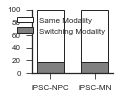

In [26]:
idx = pd.IndexSlice

sns.set(style='ticks', context='paper')
fig, ax = plt.subplots(figsize=(1.75, 1.5))
palette = ['white', 'grey'] #sns.color_palette('Greys', n_colors=2)
width = 0.6

for i, (delta_modality, s) in enumerate(percent_exons_change_modalities.groupby(level=1)):
    six.print_(delta_modality)
    color = palette[i]
    x = np.arange(s.shape[0])+0.1

    bottom = bottoms.loc[idx[:, delta_modality]]
    ax.bar(x, s, bottom=bottom, label=delta_modality, color=color, edgecolor='#262626', linewidth=1, width=width)
ax.set(xticks=x + 0.3, xticklabels=bottoms.index.levels[0])
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/n_exons_change_modalities_barplot_stacked.pdf'.format(folder))


## Get just iPSC, MN modalities

In [27]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'MN')
ipsc_mn_modalities = modality_transitions.loc[rows]
ipsc_mn_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
6,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,iPSC-MN
15,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,MN,bimodal,iPSC-MN
24,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,MN,included,iPSC-MN
33,iPSC,isoform1=junction:chr10:102283687-102286731:-|...,included,MN,included,iPSC-MN
42,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN


In [28]:
ipsc_mn_modality_count = ipsc_mn_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_mn_modality_count

modality_x     modality_y   
bimodal        bimodal           269
               excluded          147
               included          154
               uncategorized       1
excluded       bimodal           243
               excluded         1836
               included            8
               uncategorized       3
included       bimodal           458
               excluded            1
               included         2737
               uncategorized       1
middle         included            1
uncategorized  bimodal            35
               excluded            5
               included            2
               uncategorized       2
dtype: int64

## Randomly permute events and see if they switch or stay the same

In [29]:
cols = ['modality_x', 'modality_y']

In [30]:
dfs = []

for i in range(100):
    modality_x_permuted = pd.Series(np.random.permutation(ipsc_mn_modalities['modality_x']), 
                                    index=ipsc_mn_modalities['modality_y'].index, name='modality_x')

    two_modalities = pd.concat([modality_x_permuted, ipsc_mn_modalities['modality_y']], axis=1)
#     print(two_modalities.shape)
#     two_modalities.head()
    sizes = two_modalities.groupby(cols).size().reset_index()
    sizes = sizes.rename(columns={0: 'Number of events'})
    sizes['Percentage of events'] = 100*sizes['Number of events']/ipsc_mn_modalities.shape[0]
    sizes['iteration'] = i
    dfs.append(sizes)
permuted_changing_modalities = pd.concat(dfs, ignore_index=True)
print(permuted_changing_modalities.shape)
permuted_changing_modalities.head()

(1560, 5)


,modality_x,modality_y,Number of events,Percentage of events,iteration
0,bimodal,bimodal,97,1.643232,0
1,bimodal,excluded,203,3.438929,0
2,bimodal,included,270,4.573945,0
3,bimodal,uncategorized,1,0.016941,0
4,excluded,bimodal,335,5.675080,0


In [31]:
def add_switching_columns(df):
    df['Modality change'] = 'Same modality'
    
    changing = df['modality_x'] != df['modality_y']
    df.loc[changing, 'Modality change'] = 'Switching modality'


In [32]:
add_switching_columns(permuted_changing_modalities)
permuted_changing_modalities.head()

,modality_x,modality_y,Number of events,Percentage of events,iteration,Modality change
0,bimodal,bimodal,97,1.643232,0,Same modality
1,bimodal,excluded,203,3.438929,0,Switching modality
2,bimodal,included,270,4.573945,0,Switching modality
3,bimodal,uncategorized,1,0.016941,0,Switching modality
4,excluded,bimodal,335,5.675080,0,Switching modality


In [33]:
permuted_changing_modalities.groupby('Modality change')['Percentage of events'].mean()

Modality change
Same modality         12.906838
Switching modality     4.792613
Name: Percentage of events, dtype: float64

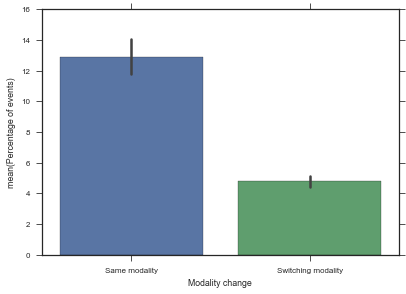

In [34]:
sns.barplot(y='Percentage of events', x='Modality change', data=permuted_changing_modalities)

## Heatmaps

In [35]:

ipsc_mn_modality_2d = ipsc_mn_modality_count.unstack()
ipsc_mn_modality_2d.head()

modality_y,bimodal,excluded,included,uncategorized
modality_x,,,,
bimodal,269.0,147.0,154.0,1.0
excluded,243.0,1836.0,8.0,3.0
included,458.0,1.0,2737.0,1.0
middle,NaN,NaN,1.0,NaN
uncategorized,35.0,5.0,2.0,2.0


In [36]:
ipsc_mn_modality_2d.index.name = 'iPSC'
ipsc_mn_modality_2d.columns.name = 'MN'
ipsc_mn_modality_2d.head()

MN,bimodal,excluded,included,uncategorized
iPSC,,,,
bimodal,269.0,147.0,154.0,1.0
excluded,243.0,1836.0,8.0,3.0
included,458.0,1.0,2737.0,1.0
middle,NaN,NaN,1.0,NaN
uncategorized,35.0,5.0,2.0,2.0


In [37]:
from anchor import MODALITY_ORDER

In [38]:
ipsc_mn_modality_2d = ipsc_mn_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_mn_modality_2d

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,1836.0,243.0,8.0,NaN,3.0
bimodal,147.0,269.0,154.0,NaN,1.0
included,1.0,458.0,2737.0,NaN,1.0
middle,NaN,NaN,1.0,NaN,NaN
uncategorized,5.0,35.0,2.0,NaN,2.0


In [39]:
sns.set(style='ticks', context='paper')

### Get percentages for comparison - use % of events in both

In [40]:
percentages = 100*ipsc_mn_modality_2d.divide(ipsc_mn_modality_2d.sum(axis=1), axis=0)
percentages

MN,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,87.846890,11.626794,0.382775,NaN,0.143541
bimodal,25.744308,47.110333,26.970228,NaN,0.175131
included,0.031279,14.325931,85.611511,NaN,0.031279
middle,NaN,NaN,100.000000,NaN,NaN
uncategorized,11.363636,79.545455,4.545455,NaN,4.545455


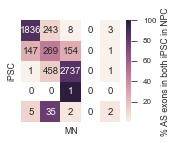

In [41]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(percentages, cbar_kws=dict(label='% AS exons in both iPSC in NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_mn_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_mn_modality_heatmap.pdf'.format(folder))

### iPSC-NPC $\Delta$ modality heatmap

In [42]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'NPC')
ipsc_npc_modalities = modality_transitions.loc[rows]
ipsc_npc_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
7,iPSC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,iPSC-NPC
16,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,NPC,bimodal,iPSC-NPC
25,iPSC,isoform1=junction:chr10:102114390-102120490:+|...,included,NPC,included,iPSC-NPC
34,iPSC,isoform1=junction:chr10:102283687-102286731:-|...,included,NPC,included,iPSC-NPC
43,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,NPC,included,iPSC-NPC


In [43]:
ipsc_npc_modality_count = ipsc_npc_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_npc_modality_2d = ipsc_npc_modality_count.unstack()
ipsc_npc_modality_2d.index.name = 'iPSC'
ipsc_npc_modality_2d.columns.name = 'NPC'
ipsc_npc_modality_2d = ipsc_npc_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_npc_percentages = 100*ipsc_npc_modality_2d.divide(ipsc_npc_modality_2d.sum(axis=1), axis=0)
ipsc_npc_percentages

NPC,excluded,bimodal,included,middle,uncategorized
iPSC,,,,,
excluded,88.150996,11.814051,NaN,NaN,0.034953
bimodal,21.512151,54.275428,24.032403,NaN,0.180018
included,0.021418,13.643178,86.271150,NaN,0.064254
middle,NaN,NaN,100.000000,NaN,NaN
uncategorized,5.882353,74.509804,3.921569,NaN,15.686275


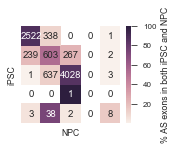

In [44]:
import colorsys

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_npc_percentages, cbar_kws=dict(label='% AS exons in both iPSC and NPC'))#, annot=True, fmt='.1f')

# fig.axes[-1].yaxis.locator_params()

raw = ipsc_npc_modality_2d.ix[::-1]

mesh = ax.collections[0]

fmt = 'g'

mesh.update_scalarmappable()
xpos, ypos = np.meshgrid(ax.get_xticks(), ax.get_yticks())
for x, y, percentage, val, color in zip(xpos.flat, ypos.flat, 
                            mesh.get_array(), raw.values.flat, mesh.get_facecolors()):
#     print val
    if percentage is not np.ma.masked:
        _, l, _ = colorsys.rgb_to_hls(*color[:3])
        text_color = ".15" if l > .5 else "w"
        val = ("{:" + fmt + "}").format(val)
        text_kwargs = dict(color=text_color, ha="center", va="center")
#         text_kwargs.update(self.annot_kws)
        ax.text(x, y, val, **text_kwargs)
    else:
        text_kwargs = dict(color='.15', ha="center", va="center")
        ax.text(x, y, 0, **text_kwargs)
ax.set(xticks=[], yticks=[])
fig.tight_layout()
fig.savefig('{}/ipsc_to_npc_modality_heatmap.pdf'.format(folder))

## Statistical enrichment of motif changes

In [45]:
transitions = [(u'iPSC', u'NPC'), (u'iPSC', u'MN')]

In [46]:
hypergeom?

Object `hypergeom` not found.


In [47]:
from scipy.stats import hypergeom

In [48]:
import itertools

lines = []

for phenotype1, phenotype2 in transitions:
    modality_subset = modality_transitions.query('(phenotype_x == @phenotype1) & (phenotype_y == @phenotype2)')
#     six.print_(phenotype1, phenotype2, modality_subset.shape)
    M = len(modality_subset['event_id'].unique())
    
    for modality1, modality2 in itertools.product(MODALITY_ORDER, repeat=2):
#         six.print_('\t', modality1, modality2)
        df1 = modality_subset.query('(phenotype_x == @phenotype1) & (modality_x == @modality1)')
        df2 = modality_subset.query('(phenotype_y == @phenotype2) & (modality_y == @modality2)')
        
        n = df1.shape[0]
        N = df2.shape[0]
        x = len(set(df1['event_id']) & set(df2['event_id']))
#         six.print_('\t\t', x, M, n, N)
        if x > 0:
            result = -hypergeom.logsf(x, M, n, N)
#             six.print_('\t\t\t', result)
            lines.append([phenotype1, modality1, phenotype2, modality2, result])
enrichment = pd.DataFrame(lines, columns=['phenotype1', 'modality1', 'phenotype2', 'modality2', '$-\log_{10}(p)$'])
enrichment['$-\log_{10}(q)$'] = enrichment['$-\log_{10}(p)$'] - np.log10(enrichment.shape[0])
enrichment

,phenotype1,modality1,phenotype2,modality2,$-\log_{10}(p)$,$-\log_{10}(q)$
0,iPSC,excluded,NPC,excluded,3.393263e+03,3391.744038
1,iPSC,excluded,NPC,bimodal,6.386003e-13,-1.518514
2,iPSC,excluded,NPC,uncategorized,2.978496e-02,-1.488729
3,iPSC,bimodal,NPC,excluded,-5.342393e-13,-1.518514
4,iPSC,bimodal,NPC,bimodal,4.328236e+02,431.305126
5,iPSC,bimodal,NPC,included,2.339462e-12,-1.518514
6,iPSC,bimodal,NPC,uncategorized,1.339539e+00,-0.178975
7,iPSC,included,NPC,excluded,2.581491e-12,-1.518514
8,iPSC,included,NPC,bimodal,-3.482992e-12,-1.518514
9,iPSC,included,NPC,included,3.174630e+03,3173.111135


In [49]:
enrichment_2d = enrichment.pivot_table(index=['phenotype1', 'modality1'], 
                                       columns=['phenotype2', 'modality2'], 
                                       values='$-\log_{10}(q)$')

In [50]:
columns = pd.MultiIndex.from_product([['NPC', 'MN'], MODALITY_ORDER])
index = pd.MultiIndex.from_product([['iPSC'], MODALITY_ORDER])

enrichment_2d = enrichment_2d.reindex(columns=columns, index=index)
enrichment_2d

NPC                                                \
                       excluded     bimodal     included middle uncategorized   
iPSC excluded       3391.744038   -1.518514          NaN    NaN     -1.488729   
     bimodal          -1.518514  431.305126    -1.518514    NaN     -0.178975   
     included         -1.518514   -1.518514  3173.111135    NaN     -1.503778   
     middle                 NaN         NaN          inf    NaN           NaN   
     uncategorized    -1.518506   41.034724    -1.518514    NaN     37.892005   

                             MN                                                
                       excluded     bimodal     included middle uncategorized  
iPSC excluded       2362.991018   -1.518514    -1.518514    NaN      0.059120  
     bimodal          -1.518504  161.737379    -1.518514    NaN      0.436525  
     included         -1.518514   -1.518514  2158.156689    NaN     -1.478373  
     middle                 NaN         NaN          inf    NaN           NaN  
     uncategorized    -1.517865   45.154575    -1.518514    NaN      9.713114

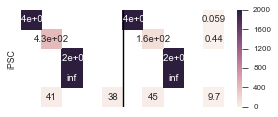

In [51]:
fig, ax = plt.subplots(figsize=(4, 1.75))
sns.heatmap(enrichment_2d, mask=enrichment_2d < 0, vmin=0, vmax=2000, annot=True)

ymin, ymax = ax.get_ylim()
ax.vlines(5, ymin, ymax)
ax.set(xticks=[], yticks=[], ylabel='iPSC', xlabel='')
fig.tight_layout()

## Barplot of changes to/from bimodal

In [52]:
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,MN-MN
1,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,MN-NPC
2,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,iPSC,included,MN-iPSC
3,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,NPC-MN
4,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,NPC-NPC


In [53]:
modality_transitions['transition'] = modality_transitions['phenotype_x'] + '-' + modality_transitions['phenotype_y']
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
0,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,MN-MN
1,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,MN-NPC
2,MN,isoform1=junction:chr10:101163392-101165512:-|...,included,iPSC,included,MN-iPSC
3,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,MN,included,NPC-MN
4,NPC,isoform1=junction:chr10:101163392-101165512:-|...,included,NPC,included,NPC-NPC


In [54]:
transitions_of_interest = ['iPSC-NPC', 'iPSC-MN']

In [55]:
transition_rows = modality_transitions.transition.isin(transitions_of_interest)
delta_modality_rows = modality_transitions['modality_x'] != modality_transitions['modality_y']
modality_transitions_different_modalities = modality_transitions.loc[transition_rows & delta_modality_rows]
modality_transitions_different_modalities['transition'] = pd.Categorical(modality_transitions_different_modalities['transition'], 
                                                           categories=transitions_of_interest, ordered=True)
modality_transitions_different_modalities.head()

/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,phenotype_x,event_id,modality_x,phenotype_y,modality_y,transition
15,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,MN,bimodal,iPSC-MN
16,iPSC,isoform1=junction:chr10:101476219-101480743:-|...,included,NPC,bimodal,iPSC-NPC
42,iPSC,isoform1=junction:chr10:102746733-102747069:-|...,included,MN,bimodal,iPSC-MN
47,iPSC,isoform1=junction:chr10:103113986-103190101:+|...,excluded,MN,bimodal,iPSC-MN
59,iPSC,isoform1=junction:chr10:103190210-103239124:+|...,bimodal,MN,included,iPSC-MN


In [56]:
delta_modalities = modality_transitions_different_modalities.groupby(['transition', 'modality_x', 'modality_y']).size()
delta_modalities = delta_modalities.reset_index()
delta_modalities = delta_modalities.rename(columns={0: '# AS Exons'})
delta_modalities

,transition,modality_x,modality_y,# AS Exons
0,iPSC-NPC,bimodal,excluded,239
1,iPSC-NPC,bimodal,included,267
2,iPSC-NPC,bimodal,uncategorized,2
3,iPSC-NPC,excluded,bimodal,338
4,iPSC-NPC,excluded,uncategorized,1
5,iPSC-NPC,included,bimodal,637
6,iPSC-NPC,included,excluded,1
7,iPSC-NPC,included,uncategorized,3
8,iPSC-NPC,middle,included,1
9,iPSC-NPC,uncategorized,bimodal,38


In [57]:
delta_modalities.groupby('transition')['# AS Exons'].sum()

transition
iPSC-NPC    1532
iPSC-MN     1059
Name: # AS Exons, dtype: int64

In [58]:
col = '$\Delta$ Modality'

# Label everythign as "Other" first
delta_modalities[col] = 'Other'

modality1_bimodal = delta_modalities['modality_x'] == 'bimodal'
modality2_bimodal = delta_modalities['modality_y'] == 'bimodal'

# From bimodal
delta_modalities.loc[modality1_bimodal, col] = 'Bimodal --> X'

# To Bimodal
delta_modalities.loc[modality2_bimodal, col] = 'X --> Bimodal'
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality
0,iPSC-NPC,bimodal,excluded,239,Bimodal --> X
1,iPSC-NPC,bimodal,included,267,Bimodal --> X
2,iPSC-NPC,bimodal,uncategorized,2,Bimodal --> X
3,iPSC-NPC,excluded,bimodal,338,X --> Bimodal
4,iPSC-NPC,excluded,uncategorized,1,Other
5,iPSC-NPC,included,bimodal,637,X --> Bimodal
6,iPSC-NPC,included,excluded,1,Other
7,iPSC-NPC,included,uncategorized,3,Other
8,iPSC-NPC,middle,included,1,Other
9,iPSC-NPC,uncategorized,bimodal,38,X --> Bimodal


In [59]:
delta_modalities['% Changing AS Exons'] = delta_modalities.groupby('transition')['# AS Exons'].apply(lambda x: 100*x/x.sum())
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,iPSC-NPC,bimodal,excluded,239,Bimodal --> X,15.600522
1,iPSC-NPC,bimodal,included,267,Bimodal --> X,17.428198
2,iPSC-NPC,bimodal,uncategorized,2,Bimodal --> X,0.130548
3,iPSC-NPC,excluded,bimodal,338,X --> Bimodal,22.062663
4,iPSC-NPC,excluded,uncategorized,1,Other,0.065274
5,iPSC-NPC,included,bimodal,637,X --> Bimodal,41.579634
6,iPSC-NPC,included,excluded,1,Other,0.065274
7,iPSC-NPC,included,uncategorized,3,Other,0.195822
8,iPSC-NPC,middle,included,1,Other,0.065274
9,iPSC-NPC,uncategorized,bimodal,38,X --> Bimodal,2.480418


In [60]:
delta_modalities.groupby(['transition', '$\Delta$ Modality'])['% Changing AS Exons'].sum()

transition  $\Delta$ Modality
iPSC-NPC    Bimodal --> X        33.159269
            Other                 0.718016
            X --> Bimodal        66.122715
iPSC-MN     Bimodal --> X        28.517469
            Other                 1.983003
            X --> Bimodal        69.499528
Name: % Changing AS Exons, dtype: float64

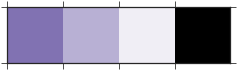

In [61]:
palette = sns.light_palette(MODALITY_TO_COLOR['bimodal'], n_colors=3, reverse=True) + ['k']
sns.palplot(palette)

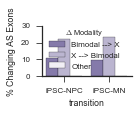

In [62]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(x='transition', y='% Changing AS Exons', palette=palette,
            hue=col, data=delta_modalities, ci=None, order=transitions_of_interest)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% Changing AS Exons')

sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_barplot.pdf'.format(folder))

# ax.set(ylim=(0, 1))
# ax.legend_.set_visible(False)
# fig.savefig('{}/changing_modalities_barplot_zoom.pdf'.format(folder))

### Stacked bar plot

In [63]:
delta_modalities['$\Delta$ Modality'] = pd.Categorical(delta_modalities['$\Delta$ Modality'], 
                                                       categories=[ 'X --> Bimodal', 'Bimodal --> X', 'Other'], ordered=True)
# delta_modalities['transition'] = pd.Categorical(delta_modalities['transition'], 
#                                                        categories=transitions_of_interest, ordered=True)
delta_modalities

,transition,modality_x,modality_y,# AS Exons,$\Delta$ Modality,% Changing AS Exons
0,iPSC-NPC,bimodal,excluded,239,Bimodal --> X,15.600522
1,iPSC-NPC,bimodal,included,267,Bimodal --> X,17.428198
2,iPSC-NPC,bimodal,uncategorized,2,Bimodal --> X,0.130548
3,iPSC-NPC,excluded,bimodal,338,X --> Bimodal,22.062663
4,iPSC-NPC,excluded,uncategorized,1,Other,0.065274
5,iPSC-NPC,included,bimodal,637,X --> Bimodal,41.579634
6,iPSC-NPC,included,excluded,1,Other,0.065274
7,iPSC-NPC,included,uncategorized,3,Other,0.195822
8,iPSC-NPC,middle,included,1,Other,0.065274
9,iPSC-NPC,uncategorized,bimodal,38,X --> Bimodal,2.480418


In [64]:
changing_as_exons = delta_modalities.groupby(['transition', col])['% Changing AS Exons'].sum()
changing_as_exons

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal        66.122715
            Bimodal --> X        33.159269
            Other                 0.718016
iPSC-MN     X --> Bimodal        69.499528
            Bimodal --> X        28.517469
            Other                 1.983003
Name: % Changing AS Exons, dtype: float64

In [65]:
cumulative_sum = changing_as_exons.groupby(level=0).cumsum()
cumulative_sum

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal         66.122715
            Bimodal --> X         99.281984
            Other                100.000000
iPSC-MN     X --> Bimodal         69.499528
            Bimodal --> X         98.016997
            Other                100.000000
Name: % Changing AS Exons, dtype: float64

In [66]:
bottoms = cumulative_sum - changing_as_exons
bottoms

transition  $\Delta$ Modality
iPSC-NPC    X --> Bimodal         0.000000
            Bimodal --> X        66.122715
            Other                99.281984
iPSC-MN     X --> Bimodal         0.000000
            Bimodal --> X        69.499528
            Other                98.016997
Name: % Changing AS Exons, dtype: float64

In [67]:
bottoms.index.levels[0]

CategoricalIndex([u'iPSC-NPC', u'iPSC-MN'], categories=[u'iPSC-NPC', u'iPSC-MN'], ordered=True, name=u'transition', dtype='category')

In [68]:
idx = pd.IndexSlice

X --> Bimodal
Bimodal --> X
Other


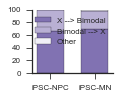

In [69]:
fig, ax = plt.subplots(figsize=(1.75, 1.5))
width = 0.6


for i, (delta_modality, s) in enumerate(changing_as_exons.groupby(level=1)):
    six.print_(delta_modality)
    color = palette[i]
    x = np.arange(s.shape[0]) + 0.1

    bottom = bottoms.loc[idx[:, delta_modality]]
    ax.bar(x, s, bottom=bottom, label=delta_modality, color=color, width=width)
ax.set(xticks=x + 0.3, xticklabels=bottoms.index.levels[0])
ax.legend()
sns.despine()
fig.tight_layout()
fig.savefig('{}/changing_modalities_bimodal_barplot_stacked.pdf'.format(folder))


### Pie chart for graphic summary

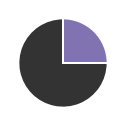

In [70]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.pie([.75, .25], startangle=90, colors=['.20', MODALITY_TO_COLOR['bimodal']], 
       wedgeprops = { 'linewidth' : 2, 'edgecolor':'white' })
fig.savefig('{}/bimodal_unimodal_pie_chart.pdf'.format(folder))

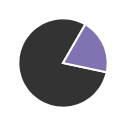

In [71]:
fig, ax = plt.subplots(figsize=(2, 2))

ax.pie([.8, .20], startangle=60, colors=['.20', MODALITY_TO_COLOR['bimodal']],
       wedgeprops = { 'linewidth' : 2, 'edgecolor':'white' })
fig.savefig('{}/changing_events_pie_chart.pdf'.format(folder))

In [72]:
study.supplemental.modalities_tidy.groupby('phenotype').size()

phenotype
MN       6597
NPC      9414
iPSC    12661
dtype: int64

## GO enrichment

In [73]:
study.splicing.feature_expression_id_col = 'ensembl_id'

In [76]:
gene_ontology = pd.read_csv('/projects/ps-yeolab/obotvinnik/flotilla_projects/hg19/gene_ontology.csv', index_col=0)
print(gene_ontology.shape)
gene_ontology.head()

(11683017, 6)


,Ensembl Gene ID,Associated Gene Name,GOSlim GOA Accession(s),GO Term Accession,GO Term Name,GO domain
0,ENSG00000177275,OR2AJ1,GO:0008150,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
1,ENSG00000177275,OR2AJ1,GO:0003674,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
2,ENSG00000177275,OR2AJ1,GO:0005575,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
3,ENSG00000177275,OR2AJ1,GO:0005623,GO:0007186,G-protein coupled receptor signaling pathway,biological_process
4,ENSG00000177275,OR2AJ1,GO:0005886,GO:0007186,G-protein coupled receptor signaling pathway,biological_process


In [74]:
go_dfs = []

for transition, df in modality_transitions_subset.groupby('transition'):
    background_events = df['event_id']
    foreground_events = background_events.loc[df.modality_x != df.modality_y]
    
    foreground = study.splicing.splicing_to_expression_id(foreground_events)
    background = study.splicing.splicing_to_expression_id(background_events)
    
    go_df = study.go_enrichment(foreground, background, domain='biological_process')
    
    
    fig, ax = plt.subplots(figsize=(1, 1))
    n = 5
    bottom = np.arange(n)
    height = go_df['bonferonni_corrected_negative_log_p_value'].iloc[:n]
    ax.barh(bottom, height, color='gray', zorder=-1)
    ax.set(yticklabels=go_df['go_name'].iloc[:n], 
           xlabel='$\log(q)$', title=transition, yticks=bottom + 0.4)
    ax.grid(axis='x', color='white', zorder=100, linewidth=0.5)
    sns.despine()
    fig.savefig('{}/changing_events_{}_go_enrichment.pdf'.format(folder, transition))
    
    go_df['transition'] = transition
    go_dfs.append(go_df.reset_index())
go = pd.concat(go_dfs)
go.head()

AttributeError: 'Study' object has no attribute 'gene_ontology'

### Try with the "world" of background events is equal between these (all events with 10+ cells in all celltypes)

In [ ]:
modality_transitions_subset_detected_in_all = modality_transitions_subset.loc[modality_transitions_subset.event_id.isin(events_detected_in_all)]

go_dfs = []

for transition, df in modality_transitions_subset_detected_in_all.groupby('transition'):
    background_events = df['event_id']
    foreground_events = background_events.loc[df.modality_x != df.modality_y]
    
    foreground = study.splicing.splicing_to_expression_id(foreground_events)
    background = study.splicing.splicing_to_expression_id(background_events)
    
    go_df = study.go_enrichment(foreground, background, domain='biological_process')
    
    
    fig, ax = plt.subplots(figsize=(3, 1.5))
    n = 5
    bottom = np.arange(n)
    height = go_df['bonferonni_corrected_negative_log_p_value'].iloc[:n]
    ax.barh(bottom, height, color='gray')
    ax.set(yticklabels=go_df['go_name'].iloc[:n], 
           xlabel='$\log(q)$', title=transition, yticks=bottom + 0.4)
    sns.despine()
    fig.savefig('{}/changing_events_{}_go_enrichment_detected_inall.pdf'.format(folder, transition))
    
#     go_df['transition'] = transition
#     go_dfs.append(go_df.reset_index())
# go = pd.concat(go_dfs)
# go.head()

In [ ]:
changing_events_unique_to_transition = \
    {'iPSC-MN_unique' : ipsc_mn_changing_events_detected_in_all.difference(ipsc_npc_changing_events_detected_in_all),
     'iPSC-NPC_and_iPSC-MN' : ipsc_mn_changing_events_detected_in_all.intersection(ipsc_npc_changing_events_detected_in_all),
     'iPSC-NPC_unique' : ipsc_npc_changing_events_detected_in_all.difference(ipsc_mn_changing_events_detected_in_all)
    }
    
background_events = events_detected_in_all

for transition, foreground_events in changing_events_unique_to_transition.items():    
    foreground = study.splicing.splicing_to_expression_id(foreground_events)
    background = study.splicing.splicing_to_expression_id(background_events)
    
    go_df = study.go_enrichment(foreground, background, domain='biological_process')
    
    fig, ax = plt.subplots(figsize=(3, 1.5))
    n = 5
    bottom = np.arange(n)
    height = go_df['bonferonni_corrected_negative_log_p_value'].iloc[:n]
    ax.barh(bottom, height, color='gray')
    ax.set(yticklabels=go_df['go_name'].iloc[:n], 
           xlabel='$\log(q)$', title=transition, yticks=bottom + 0.4)
    sns.despine()
    fig.savefig('{}/changing_events_{}_go_enrichment_detected_inall.pdf'.format(folder, transition))
    
#     go_df['transition'] = transition
#     go_dfs.append(go_df.reset_index())
# go = pd.concat(go_dfs)
# go.head()